In [1]:
data, full = 'XD', 'XD-Violence'
base, folder = 'LAD', 'LAD2000'
venv = f'C:\\Users\\cps1\\violence_project\\venv\\Violence'
# path = f'{venv}\\Final_Detection\\{data}_Data\\Classification'
path = f'{venv}\\..\\classification\\{data}'

In [2]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import svm
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers, models

In [3]:
x_train = np.load(f'{path}\\{data}_x_train_4000.npy')[:5000]
y_train = [1 for i in range(len(x_train))]
x_train_2 = np.load(f'{venv}\\Final_Detection\\{data}_Data\\Classification\\nv_{data}_x.npy')
y_train_2 = np.load(f'{venv}\\Final_Detection\\{data}_Data\\Classification\\nv_{data}_y.npy')
x_train = np.concatenate((x_train,x_train_2))
y_train = np.concatenate((np.array(y_train),np.array(y_train_2)))
x_train = np.moveaxis(x_train, 1, 3)

In [4]:
x_train, x_rem, y_train, y_rem = train_test_split(x_train, y_train,  train_size=0.7,shuffle = False, random_state=7)

In [5]:
x_valid, x_test, y_valid, y_test = train_test_split(x_rem,y_rem, test_size=0.5, shuffle = False,  random_state=7)

In [6]:
x_train.shape, x_test.shape, x_valid.shape

((6494, 75, 75, 15, 3), (1392, 75, 75, 15, 3), (1392, 75, 75, 15, 3))

In [7]:
model_path = f"{venv}\\Final_Detection\\Models\\{base}_Model"
model = tf.keras.models.load_model(model_path)

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d (Conv3D)             (None, 73, 73, 11, 32)    4352      
                                                                 
 max_pooling3d (MaxPooling3D  (None, 36, 36, 11, 32)   0         
 )                                                               
                                                                 
 conv3d_1 (Conv3D)           (None, 34, 34, 7, 32)     46112     
                                                                 
 max_pooling3d_1 (MaxPooling  (None, 11, 11, 7, 32)    0         
 3D)                                                             
                                                                 
 conv3d_2 (Conv3D)           (None, 9, 9, 3, 32)       46112     
                                                                 
 max_pooling3d_2 (MaxPooling  (None, 4, 4, 3, 32)      0

In [9]:
history = model.fit(x_train, y_train,
                    batch_size=32,
                    epochs=5,
                    validation_data=(x_valid, y_valid),
                    shuffle=True)

Epoch 1/5
203/203 [==============================] - 2421s 12s/step - loss: 0.3828 - accuracy: 0.8492 - val_loss: 1.4601 - val_accuracy: 0.4820
Epoch 2/5
203/203 [==============================] - 2473s 12s/step - loss: 0.2553 - accuracy: 0.8994 - val_loss: 1.1712 - val_accuracy: 0.6422
Epoch 3/5
203/203 [==============================] - 2592s 13s/step - loss: 0.2106 - accuracy: 0.9221 - val_loss: 0.9097 - val_accuracy: 0.6178
Epoch 4/5
203/203 [==============================] - 2644s 13s/step - loss: 0.1726 - accuracy: 0.9376 - val_loss: 1.2481 - val_accuracy: 0.6918
Epoch 5/5
203/203 [==============================] - 2679s 13s/step - loss: 0.1750 - accuracy: 0.9449 - val_loss: 1.3190 - val_accuracy: 0.6681


In [10]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)
test_loss, test_acc

44/44 - 20s - loss: 0.7268 - accuracy: 0.7493 - 20s/epoch - 450ms/step


(0.7268397212028503, 0.7492815852165222)

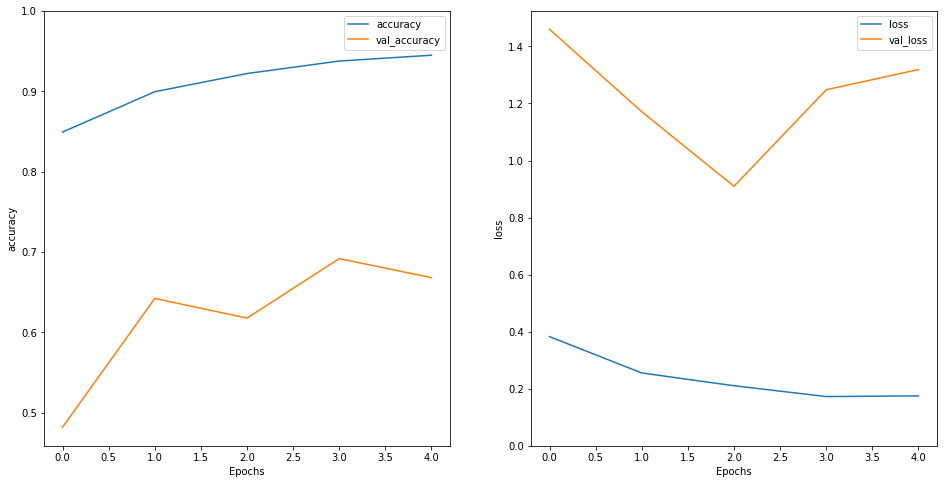

In [11]:
def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plot_graphs(history, 'accuracy')
plt.ylim(None, 1)

plt.subplot(1, 2, 2)
plot_graphs(history, 'loss')
plt.ylim(0, None)
plt.savefig(f'TL_{base}_{data}.png')

C:\Users\cps1\violence_project\venv\lib\site-packages\sklearn\metrics\_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


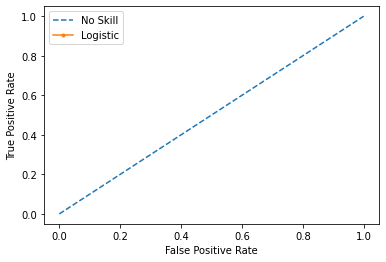

In [12]:
from sklearn.metrics import roc_curve, roc_auc_score
# predict probabilities
pos_probs = model.predict(x_test)
# plot no skill roc curve
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
# calculate roc curve for model
fpr, tpr, _ = roc_curve(y_test, pos_probs)
# plot model roc curve
plt.plot(fpr, tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [13]:
plt.savefig(f'TL_{base}_{data}_ROC.png')
roc_auc = roc_auc_score(y_test, pos_probs)
print('Logistic ROC AUC %.3f' % roc_auc)

ValueError: Only one class present in y_true. ROC AUC score is not defined in that case.

<Figure size 432x288 with 0 Axes>

In [ ]:
model.save(f"{venv}\\Final_Detection\\Models\\TL_{base}_{data}_Model")